<a href="https://colab.research.google.com/github/Puphat/Query-and-visualize-from-Big-Query/blob/main/Query_and_visualize_from_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import auth

from google.cloud import bigquery

auth.authenticate_user()

print('Authenticated')

Authenticated


In [ ]:
def bq_run(query_text):

  project_id = 'madt-project'

  client = bigquery.Client(project=project_id)

  df = client.query(query_text).to_dataframe()

  return df

In [ ]:
query_text = '''SELECT extract(Month FROM order_date) AS month, SUM(sales) as sales_last_year
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date >= date_add(datetime_trunc(current_date, year), INTERVAL -1 year) AND order_date < datetime_trunc(current_date, year)
                GROUP BY month
                LEFT JOIN 
                ORDER BY month 

            '''
df1 = bq_run(query_text)
df1

,month,sales_last_year
0,1,148973.22
1,2,123853.82
2,3,148960.62
3,4,124763.14
4,5,200797.36
5,6,287731.63
6,7,169590.66
7,8,240198.46
8,9,275478.94
9,10,202932.98


In [ ]:
query_text = '''
SELECT 
  CAST(lst.Month AS float64) AS Month,
  COALESCE(cur.sales_this_year,0) AS sales_this_year,
  lst.sales_last_year AS sales_last_year
FROM (
      SELECT 
        extract(Month FROM order_date) AS month, 
        SUM(sales) as sales_last_year
      FROM `madt-project.madt7101.superstore` 
      WHERE order_date >= date_add(datetime_trunc(current_date, year), INTERVAL -1 year) AND order_date < datetime_trunc(current_date, year)
      GROUP BY month
        )lst
LEFT JOIN (
        SELECT 
          extract(Month FROM order_date) AS month, 
          SUM(sales) as sales_this_year
        FROM `madt-project.madt7101.superstore` 
        WHERE order_date <= current_date AND order_date >= datetime_trunc(current_date, year)
        GROUP BY month
      )cur
ON cur.month = lst.Month
ORDER BY lst.month
            '''
df = bq_run(query_text)
df

,Month,sales_this_year,sales_last_year
0,1.0,191203.42,148973.22
1,2.0,129269.73,123853.82
2,3.0,194218.09,148960.62
3,4.0,178479.94,124763.14
4,5.0,214343.81,200797.36
5,6.0,289370.19,287731.63
6,7.0,186856.56,169590.66
7,8.0,350613.33,240198.46
8,9.0,354562.62,275478.94
9,10.0,311539.64,202932.98


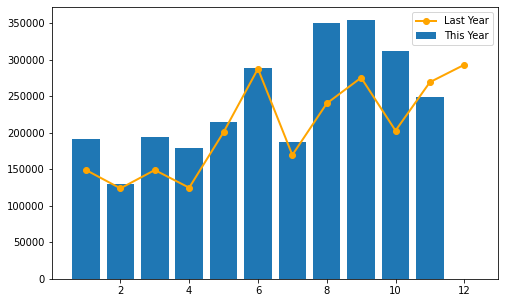

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df['Month'], df['sales_this_year'], label='This Year')
plt.plot(df['Month'], df['sales_last_year'], color='orange', label='Last Year', marker='o', linewidth=2)
plt.legend()

Google Colab <> Google Drive